In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


matplotlib.rcParams['figure.figsize'][0] = 14

# Les inn og fiks data

Dataene for 2017 har ikke 'Region'-kolonnen. I tillegg har noen land endret navn. Vi prøver å fylle ut regionene for 2017 med data fra 2015 og 2016. For land som tidligere ikke har vært med, setter vi regionen til å være den samme som deres naboland. 

In [3]:
with open('../datasets/world-happiness-report/2015.csv') as infile:
    world_2015 = pd.read_csv(infile)
    world_2015.drop(['Standard Error'], axis=1, inplace=True)

with open('../datasets/world-happiness-report/2016.csv') as infile:
    world_2016 = pd.read_csv(infile)
    world_2016.drop(['Lower Confidence Interval'], axis=1, inplace=True)
    world_2016.drop(['Upper Confidence Interval'], axis=1, inplace=True)

with open('../datasets/world-happiness-report/2017.csv') as infile:
    world_2017 = pd.read_csv(infile)
    world_2017.drop(['Whisker.high'], axis=1, inplace=True)
    world_2017.drop(['Whisker.low'], axis=1, inplace=True)
    
columns = np.array(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
                 'Economy', 'Family', 'Health',
                 'Freedom', 'Trust', 'Generosity', 
                 'Dystopia Residual'], dtype=object)

world_2017.insert(1, 'Region', '')


world_2015.columns = columns
world_2016.columns = columns
world_2017.columns = columns

world_2017.replace('Hong Kong S.A.R., China', 'Hong Kong', inplace=True)
world_2017.replace('Taiwan Province of China', 'Taiwan', inplace=True)

region_dict_2015 = dict(zip(world_2015['Country'], world_2015['Region']))
region_dict_2016 = dict(zip(world_2016['Country'], world_2016['Region']))
for i, row in world_2017.iterrows():
    try:
        world_2017.loc[i, 'Region'] = region_dict_2015[row['Country']]
    except KeyError:
        try:
            world_2017.loc[i, 'Region'] = region_dict_2016['Country']
        except KeyError:
            if row['Country'] == 'Belize':
                world_2017.loc[i, 'Region'] = region_dict_2015['Mexico']
            elif row['Country'] == 'Somalia':
                world_2017.loc[i, 'Region'] = region_dict_2015['Mexico']
            elif row['Country'] == 'Namibia':
                world_2017.loc[i, 'Region'] = region_dict_2015['Zimbabwe']
            elif row['Country'] == 'South Sudan':
                world_2017.loc[i, 'Region'] = region_dict_2015['Sudan']
            else:
                print(row['Country'])
                continue
            


In [4]:
world_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
world_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [6]:
world_2017.head()

,Country,Region,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,Norway,Western Europe,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,Western Europe,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,Western Europe,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,Western Europe,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,Western Europe,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


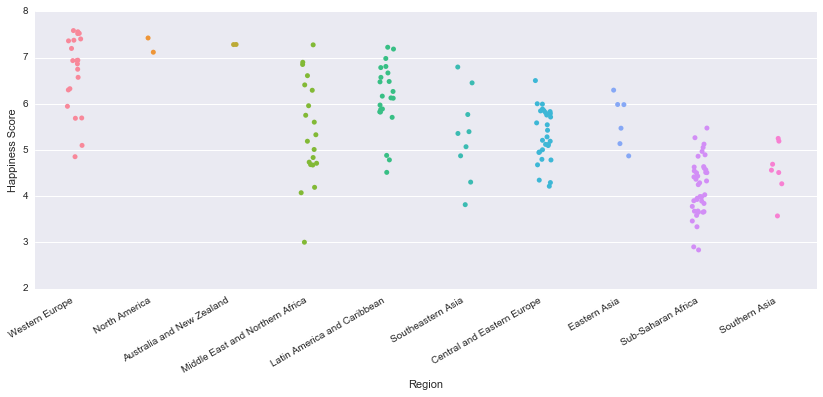

In [71]:
fig = plt.figure()
ax = sns.stripplot(x='Region', y='Happiness Score', data=world_2015, jitter=True)
fig.autofmt_xdate()
plt.show()

In [79]:
country_data = pd.DataFrame(world_2015[['Country', 'Region', 'Happiness Score']])
country_data['GDP'] = np.NaN

with open('../datasets/world-happiness-report/GDP.csv') as infile:
    gdp_data = pd.read_csv(infile)

gdp_dict = dict(zip(gdp_data['Country'], gdp_data['GDP']))

,Country,Region,Happiness Score,GDP


In [83]:
print('Land vi ikke har GDP-data for:\n------------------------------')
for i, row in country_data.iterrows():
    try:
        country_data.loc[i, 'GDP'] = gdp_dict[row['Country']]
    except KeyError:
        print(row['Country'])
        continue

Land vi ikke har GDP-data for:
------------------------------
Venezuela
Taiwan
Libya
North Cyprus
Somaliland region
Palestinian Territories
Syria


Vi tar bort disse landene

In [88]:
country_data.dropna(inplace=True)

(151, 1)
(151, 1)


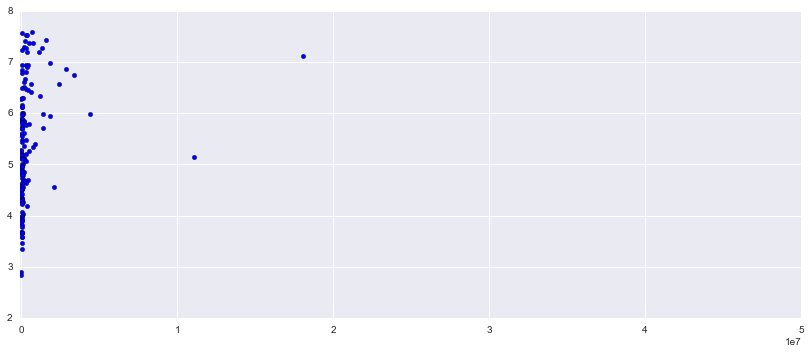

In [124]:
response = country_data['Happiness Score'].values.reshape((len(country_data),1))
var = country_data['GDP'].values.reshape((len(country_data),1))

print(response.shape)
print(var.shape)
mod = LinearRegression()
mod.fit(var, response)

t = np.matrix(np.linspace(0, 2e7, 100)).T
pred = mod.predict(t)


plt.scatter('GDP', 'Happiness Score', data=country_data)
plt.axis([-0.01e7, 5e7, 2, 8])
plt.show()